---

#  mplfinance plot customizations

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

### Read in daily data for the S&P 500 from November of 2019 

In [3]:
df = pd.read_csv('data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
df.index.name = 'Date'
df.shape
df.head(2)
df.tail(2)

(1563, 5)

,Open,Close,High,Low,Volume
Date,,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30,0
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15,0


,Open,Close,High,Low,Volume
Date,,,,,
2019-11-08 15:58:00,3090.73,3091.04,3091.13,3090.58,0
2019-11-08 15:59:00,3091.16,3092.91,3092.91,3090.96,0


In [4]:
import mplfinance as mpf
mpf.__version__

'0.12.7a9'

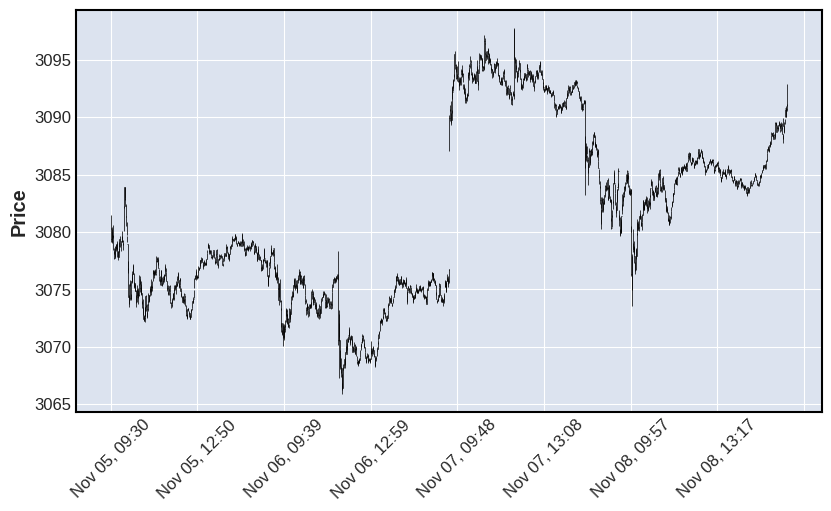

In [5]:
fig, axlist = mpf.plot(df,figratio=(9,5),returnfig=True)

In [6]:
df['TimeStamp'] = df.index.values

In [7]:
df.head()

,Open,Close,High,Low,Volume,TimeStamp
Date,,,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30,0,2019-11-05 09:30:00
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15,0,2019-11-05 09:31:00
2019-11-05 09:32:00,3079.43,3079.68,3080.46,3079.43,0,2019-11-05 09:32:00
2019-11-05 09:33:00,3079.73,3079.15,3080.22,3079.12,0,2019-11-05 09:33:00
2019-11-05 09:34:00,3079.20,3079.62,3080.03,3079.07,0,2019-11-05 09:34:00


In [8]:
df['TSdate'] = [t.date() for t in df['TimeStamp']]

In [9]:
dfg = df.groupby('TSdate')

In [10]:
dfg.first()
dfg.last()
dfg.median()
#dir(dfg)

,Open,Close,High,Low,Volume,TimeStamp
TSdate,,,,,,
2019-11-05,3080.80,3080.49,3081.47,3080.30,0,2019-11-05 09:30:00
2019-11-06,3075.10,3074.12,3075.91,3073.90,0,2019-11-06 09:30:00
2019-11-07,3087.02,3089.93,3090.17,3087.02,0,2019-11-07 09:30:00
2019-11-08,3081.25,3081.47,3081.93,3081.07,0,2019-11-08 09:30:00


,Open,Close,High,Low,Volume,TimeStamp
TSdate,,,,,,
2019-11-05,3074.78,3074.75,3074.78,3074.75,0,2019-11-05 16:00:00
2019-11-06,3076.74,3076.73,3076.74,3076.72,0,2019-11-06 16:00:00
2019-11-07,3085.41,3085.35,3085.44,3085.35,0,2019-11-07 16:00:00
2019-11-08,3091.16,3092.91,3092.91,3090.96,0,2019-11-08 15:59:00


,Open,Close,High,Low,Volume
TSdate,,,,,
2019-11-05,3077.300,3077.270,3077.530,3077.060,0
2019-11-06,3073.970,3073.970,3074.270,3073.790,0
2019-11-07,3092.590,3092.580,3092.790,3092.380,0
2019-11-08,3084.785,3084.805,3084.965,3084.595,0


In [11]:
xt = []
for t in dfg.first()['TimeStamp']:
    xt.append(df.index.get_loc(t))

In [12]:
xt

[0, 391, 782, 1173]

In [13]:
axlist[0].set_xticks(xt)

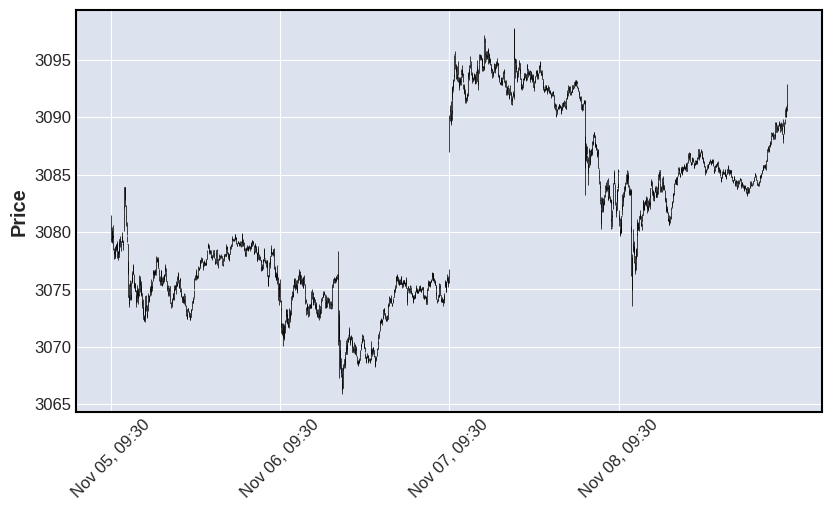

In [14]:
fig

/home/dino/code/mplfinance/src/mplfinance/plotting.py:514: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


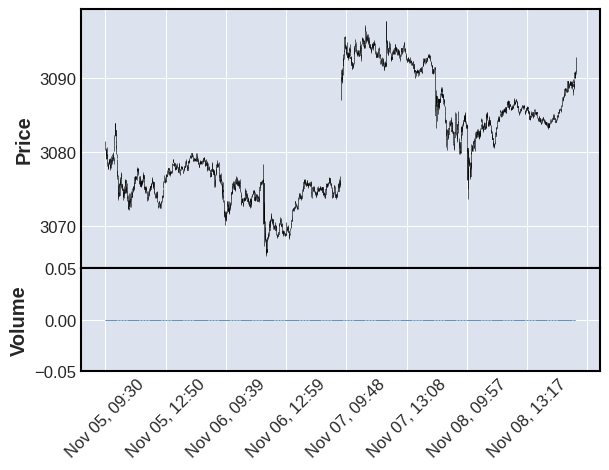

/home/dino/code/mplfinance/src/mplfinance/plotting.py:514: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


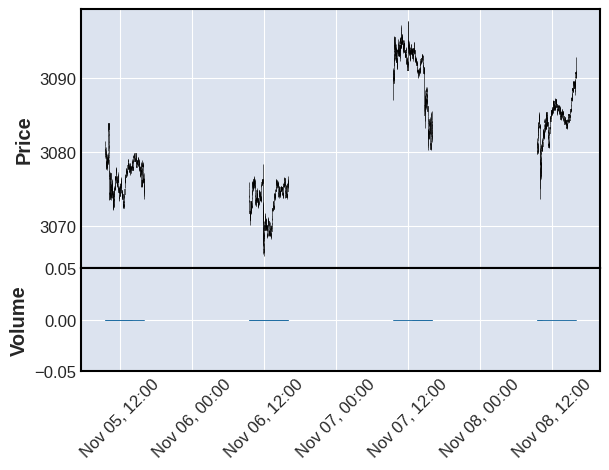

In [15]:
mpf.plot(df,type='candle',volume=True,figscale=0.9)
mpf.plot(df,type='candle',volume=True,figscale=0.9,show_nontrading=True)